In [47]:
import numpy as np
import torch
from PIL import Image
import open_clip

model, _, preprocess = open_clip.create_model_and_transforms('ViT-B-32-quickgelu', pretrained='laion400m_e32')
tokenizer = open_clip.get_tokenizer('ViT-B-32-quickgelu')

image = preprocess(Image.open("hcaji_v2.png")).unsqueeze(0)
text = tokenizer(["electronics", "a monkey", "a diagram", "a dog", "a cat", "a woman", "an outlaw", "a man"])

with torch.no_grad(), torch.cuda.amp.autocast():
    image_features = model.encode_image(image)
    text_features = model.encode_text(text)
    image_features /= image_features.norm(dim=-1, keepdim=True)
    text_features /= text_features.norm(dim=-1, keepdim=True)

    text_probs = (100.0 * image_features @ text_features.T).softmax(dim=-1)

print("Label probs:", text_probs)  # prints: [[1., 0., 0.]]

Label probs: tensor([[9.6033e-01, 5.0455e-08, 3.7759e-02, 2.2787e-07, 3.9652e-06, 8.0586e-04,
         2.8975e-09, 1.1025e-03]])


In [51]:
help(model.submodel)

AttributeError: 'CLIP' object has no attribute 'submodel'

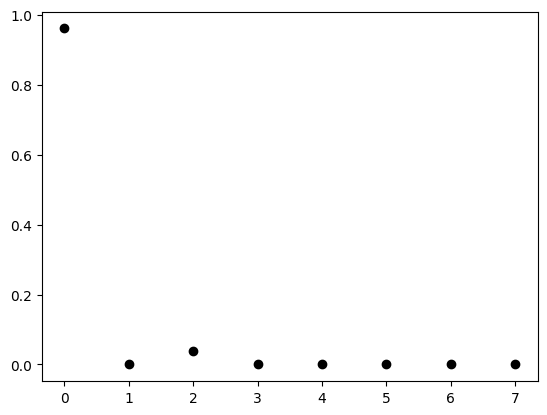

In [48]:
import matplotlib.pyplot as plt
#matplotlib inline

tt = np.array(text_probs).reshape(text_probs.shape[1])
plt.plot(tt, 'ko')

In [2]:
torch.cuda.is_available()

True